In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

df = pd.read_csv('diabetes.csv')
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


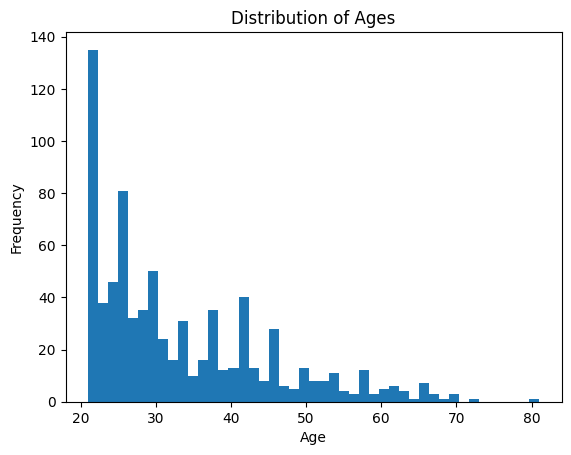

In [2]:
ages = (df['Age'])
plt.hist(ages, bins=45)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-3-97503f403847>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(df['Pregnancies'],ax=axes,color='purple')


Text(0, 0.5, 'Frequency')

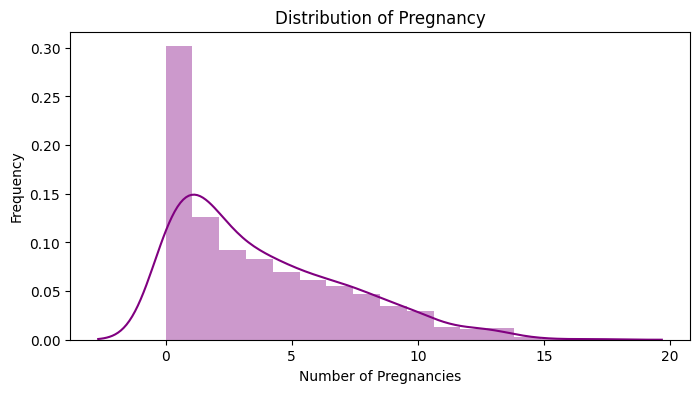

In [3]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))

plot=sns.distplot(df['Pregnancies'],ax=axes,color='purple')
axes.set_title('Distribution of Pregnancy')
axes.set_xlabel('Number of Pregnancies')
axes.set_ylabel('Frequency')

<ipython-input-4-12f6f6c4f167>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(df['Glucose'],ax=axes,color='green')


Text(0, 0.5, 'Frequency')

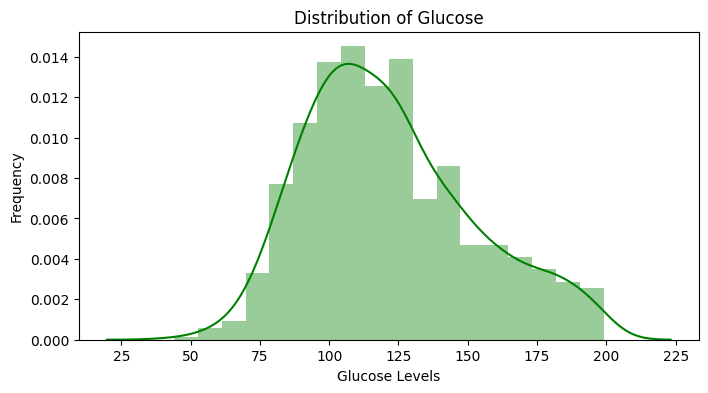

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())

plot=sns.distplot(df['Glucose'],ax=axes,color='green')
axes.set_title('Distribution of Glucose')
axes.set_xlabel('Glucose Levels')
axes.set_ylabel('Frequency')

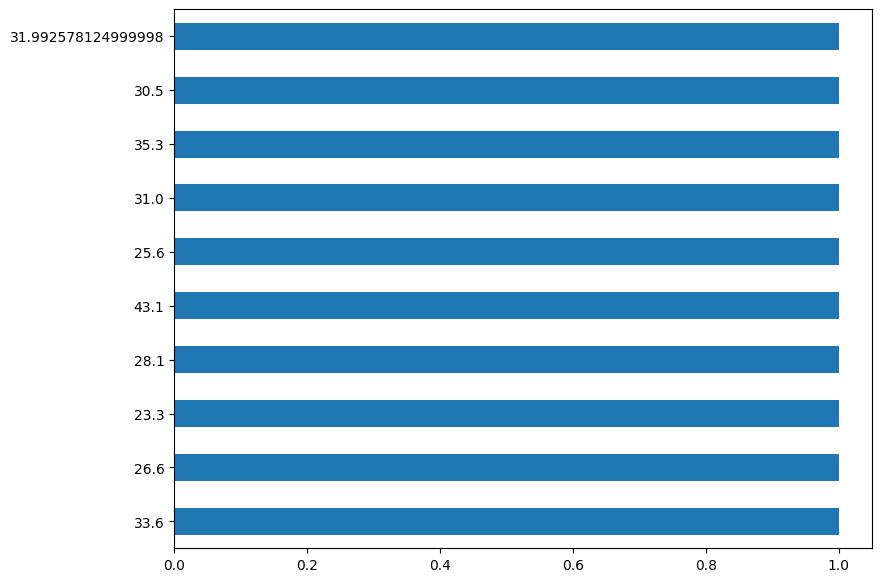

In [20]:
plt.figure(figsize=[9,7])
d=df.head(10)
d['BMI'].value_counts().plot.barh()
plt.show()

Text(0.5, 1.0, 'Box Plot of Blood Pressure')

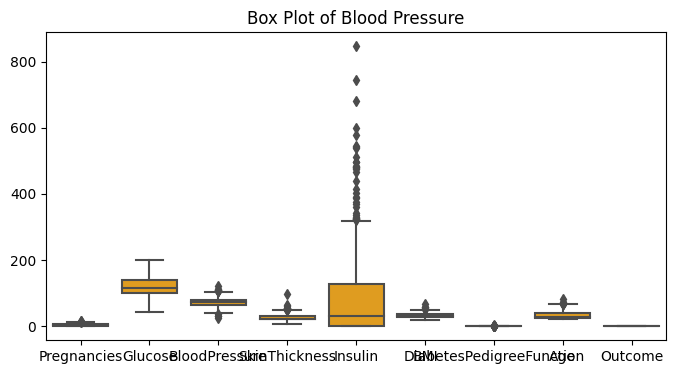

In [14]:

fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
plot=sns.boxplot(data=df,ax=axes, color='Orange')
axes.set_title('Box Plot of Blood Pressure')

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
plot=sns.distplot(df['SkinThickness'],ax=axes,color='blue')
axes.set_title('Distribution of Skin Thickness')
axes.set_xlabel('Skin Thickness')
axes.set_ylabel('Frequency')

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize = (8,4))
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
plot=sns.distplot(df['Insulin'],ax=axes,color='red')
axes.set_title('Distribution of Insulin')
axes.set_xlabel('Insulin Levels')
axes.set_ylabel('Frequency')

<ipython-input-9-b5748333488e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(df['BMI'],ax=axes,color='grey')


Text(0, 0.5, 'Frequency')

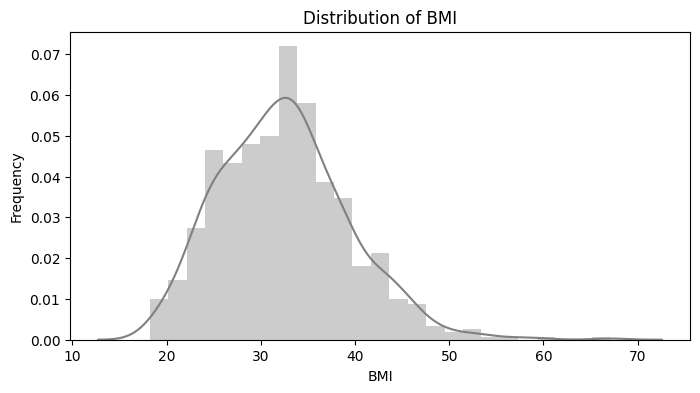

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.BMI = df.BMI.replace(0,df.BMI.mean())
plot=sns.distplot(df['BMI'],ax=axes,color='grey')
axes.set_title('Distribution of BMI')
axes.set_xlabel('BMI')
axes.set_ylabel('Frequency')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#define X
X = df.drop('Outcome',axis=1)
#define Y
Y = df['Outcome']
# split X and Y into train and test sets (using sklearn)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# create your model
model=LogisticRegression()
# fit your model
model.fit(x_train,y_train)
# predict on the testing data
predictions_test=model.predict(x_test)

#Confusion matrix for test data
conf_matrix = confusion_matrix(y_test,predictions_test)
print('The confusion matrix for the logistical regression model: ')
print()
print(conf_matrix)
print()
true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

The confusion matrix for the logistical regression model: 

[[83 16]
 [19 36]]

Sensitivity:  0.8383838383838383
Specificity:  0.6545454545454545
Accuracy:  0.7727272727272727
Error:  0.22727272727272727
Precision:  0.8137254901960784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


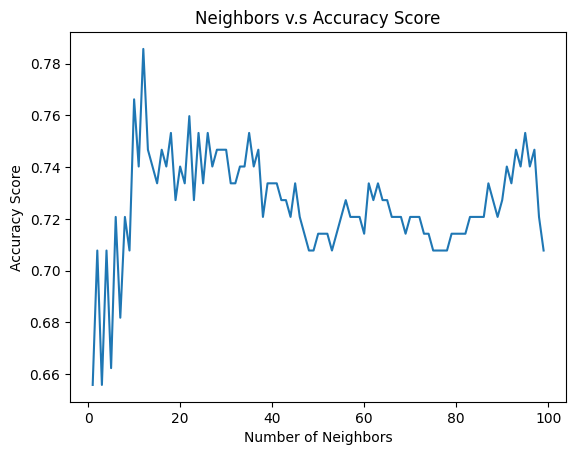

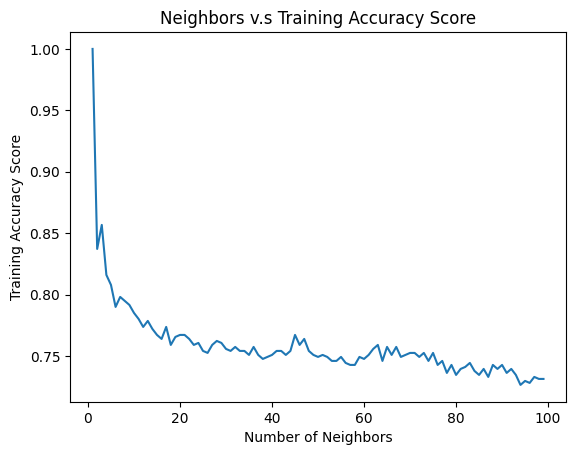


Confusion Matrix for KNearestNeighbor Model with 1 Neighbor:
[[67 32]
 [21 34]]
Sensitivity:  0.6767676767676768
Specificity:  0.6181818181818182
Accuracy:  0.6558441558441559
Error:  0.34415584415584416
Precision:  0.7613636363636364

Confusion Matrix for KNearestNeighbor Model with 10 Neighbors:
[[85 14]
 [22 33]]
Sensitivity:  0.8585858585858586
Specificity:  0.6
Accuracy:  0.7662337662337663
Error:  0.23376623376623376
Precision:  0.794392523364486

Confusion Matrix for KNearestNeighbor Model with 100 Neighbors:
[[91  8]
 [35 20]]
Sensitivity:  0.9191919191919192
Specificity:  0.36363636363636365
Accuracy:  0.7207792207792207
Error:  0.2792207792207792
Precision:  0.7222222222222222


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Using KNN to test on different sets of neighbors
#separate your X (features) and your Y (target).
X = df.drop('Outcome',axis=1).values
Y = df['Outcome'].values

#train test split your data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# This is the function we use to create the kNN model (default k=5)
knn = KNeighborsClassifier()

#We can calculate individual accuracies and then append the values to make it easier for ourselves.
accuracy_array=[]
for i in range (1,100):
    knn=KNeighborsClassifier(i)
    #fit the model using the train data
    knn.fit(x_train,y_train)
    #determine the prediction using the testing data
    predictions=knn.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    accuracy_array.append(acc)

accuracy2_array=[]
for i in range (1,100):
    knn=KNeighborsClassifier(i)
    #fit the model using the train data
    knn.fit(x_train,y_train)
    #determine the prediction using the testing data
    predictions2=knn.predict(x_train)
    acc2=accuracy_score(y_train,predictions2)
    accuracy2_array.append(acc2)

ran=range(1,100)
plt.plot(ran,accuracy_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Neighbors v.s Accuracy Score')
plt.show()

r=range(1,100)
plt.plot(r,accuracy2_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Training Accuracy Score')
plt.title('Neighbors v.s Training Accuracy Score')
plt.show()

#Confusion Matrix for KNearestNeighbor Model with 1 Neighbor
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 1 Neighbor:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

#Confusion Matrix for KNearestNeighbor Model with 10 Neighbors
knn=KNeighborsClassifier(10)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 10 Neighbors:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

#Confusion Matrix for KNearestNeighbor Model with 100 Neighbors
knn=KNeighborsClassifier(100)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 100 Neighbors:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

<ipython-input-17-c1ad703839bd>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


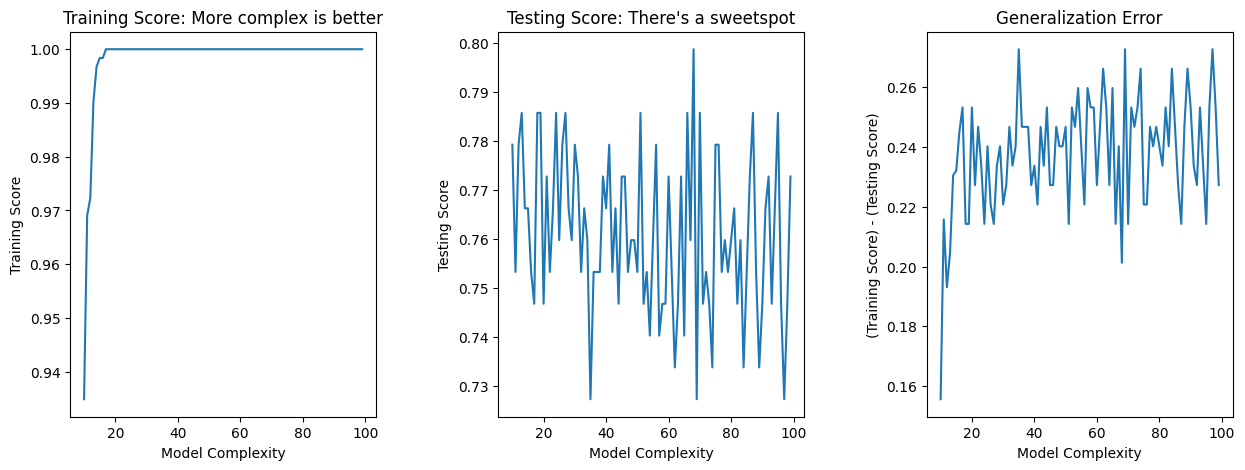

In [17]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Pregnancies','Glucose','BloodPressure','BMI']]
Y = df['Outcome']

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.2, random_state=42)
train_scores = []
test_scores = []

max_depths = list(range(10,100))
for i in max_depths:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(x_tr, y_tr)

    train_scores.append(model.score(x_tr, y_tr))
    test_scores.append(model.score(x_te, y_te))

plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
plt.plot(max_depths, train_scores)
plt.title('Training Score: More complex is better')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')
plt.subplot(132)
plt.plot(max_depths, test_scores)
plt.title("Testing Score: There's a sweetspot")
plt.xlabel('Model Complexity')
plt.ylabel('Testing Score')
plt.subplot(133)
plt.plot(max_depths, np.subtract(train_scores,test_scores))
plt.title("Generalization Error")
plt.xlabel('Model Complexity')
plt.ylabel('(Training Score) - (Testing Score)')
plt.show()